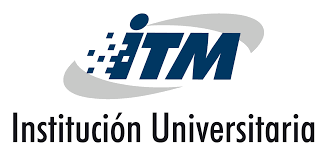

#ITM - Institución Universitaria
#Tema: Aprendizaje supervisado - Redes Neuronales Artificiales
#Juan Carlos Briñez de León

# Clase: Redes Neuronales Artificiales ANN.

#0. Cargando datos

Un problema recurrente en las máquinas de extrusión está relacionado con la eficiencia térmica del sistema, ya que el proceso requiere un control preciso de la temperatura a lo largo del cilindro y la boquilla para garantizar una correcta plastificación del material. Cuando existen pérdidas de calor por deficiencias en el aislamiento, variaciones en la distribución térmica o un consumo excesivo de energía en los resistores y sistemas de enfriamiento, se reduce la eficiencia global del proceso. Esto no solo impacta en los costos operativos debido al mayor gasto energético, sino que también afecta la calidad del producto final, generando irregularidades en la homogeneidad, acabado superficial o propiedades mecánicas del extruido. Por lo tanto, estimar la eficiencia térmica de una máquina dada la medida de temperatura se convierte en un aspecto crítico tanto para la sostenibilidad del proceso como para la competitividad de la producción.

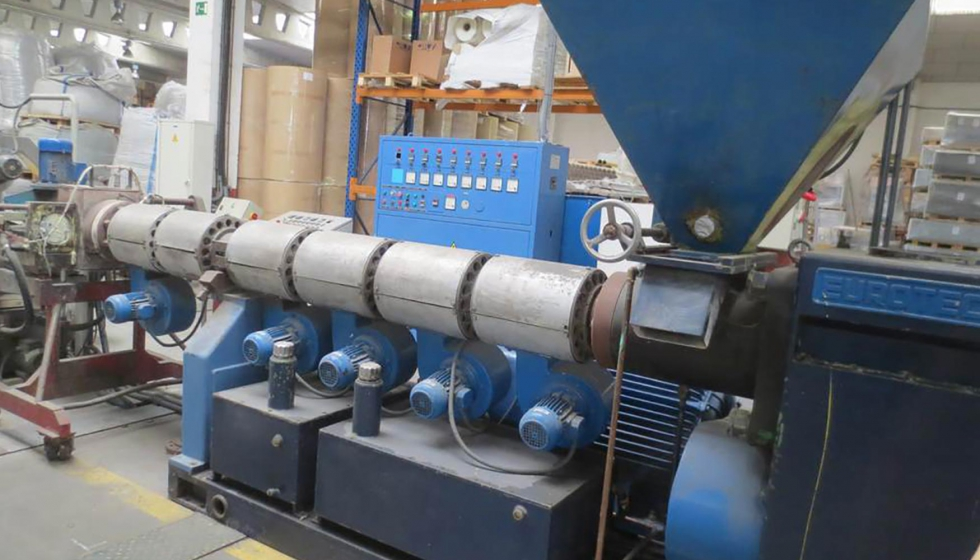

Saving datos_extrusion.csv to datos_extrusion.csv


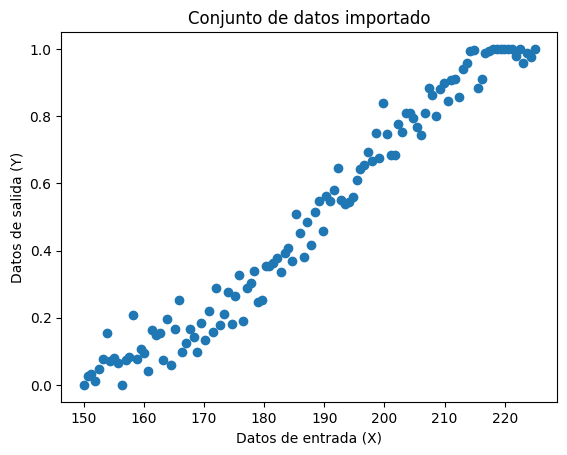

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files

# Subir, leer y cargar dataframe
uploaded = files.upload()
filename = list(uploaded.keys())[0]
data = pd.read_csv(filename)

# Asumiendo que el CSV tiene dos columnas: 'X' y 'Y'
trX = data.iloc[:, 0].values  # Primera columna como X
trY = data.iloc[:, 1].values  # Segunda columna como Y

# Graficar los datos cargados
plt.scatter(trX, trY)
plt.title("Conjunto de datos importado")
plt.xlabel("Datos de entrada (X)")
plt.ylabel("Datos de salida (Y)")
plt.show()

#1. Modelo de regresión lineal

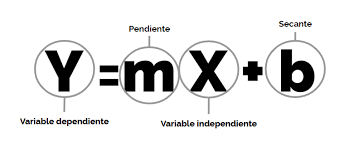

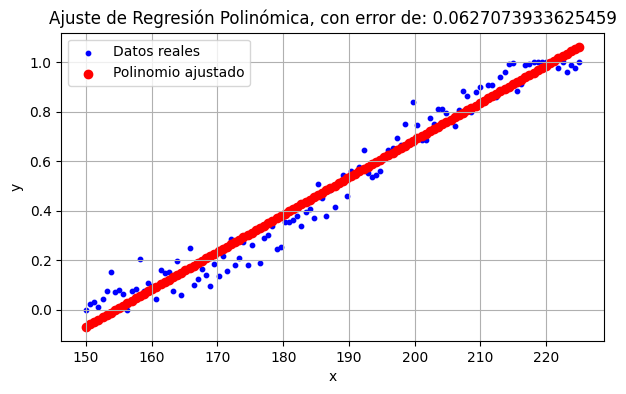

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Entrada = trX
Salida = trY
#Modelando
orden = 1
coef_ajustados = np.polyfit(Entrada, Salida, orden)
modelo = np.poly1d(coef_ajustados)

# Evaluando el modelo
Y_prediction = modelo(Entrada)
mse = np.mean(np.square(Salida - Y_prediction))
rmse = np.sqrt(mse)

# Graficar los datos originales y los datos del polinomio ajustado
plt.figure(figsize=(7, 4))
plt.scatter(Entrada, Salida, label='Datos reales', color='blue', s=10)
plt.scatter(Entrada, Y_prediction, label='Polinomio ajustado', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste de Regresión Polinómica, con error de: '+str(rmse))
plt.legend()
plt.grid(True)
plt.show()

Neurona artificial

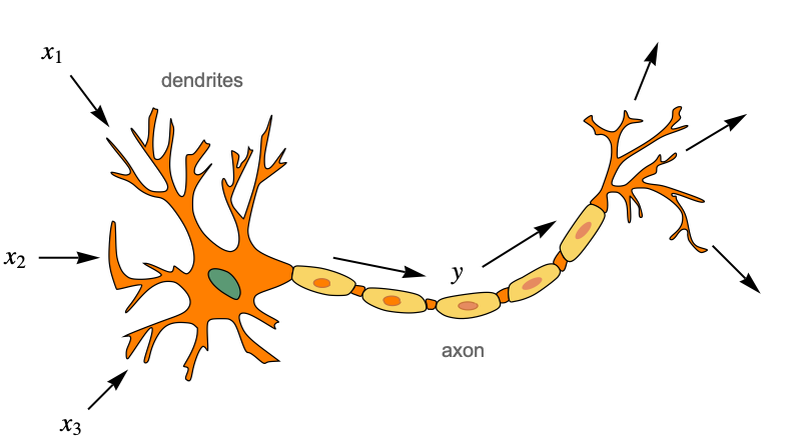

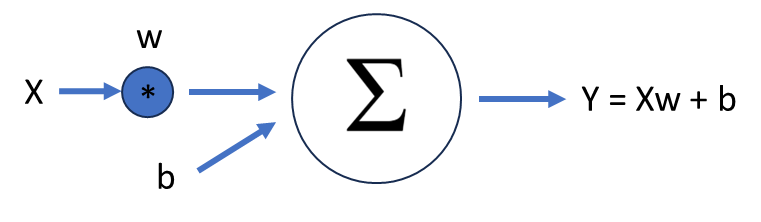

Modelo de regresión lineal por ANN

Modelo final: m=1.1298, b=-0.0674
Finalizado en 499 iteraciones


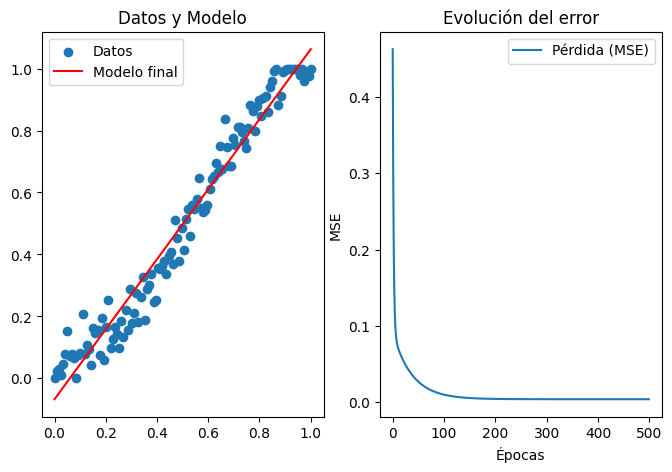

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import output
import random
# Normalizando datos de entrada
trX = (Entrada - np.min(Entrada)) / (np.max(Entrada) - np.min(Entrada))
trY = (Salida - np.min(Salida)) / (np.max(Salida) - np.min(Salida))

# Inicialización de parámetros
np.random.seed(42)
m = np.random.rand()  # Valores aleatorios entre 0 y 10
b = np.random.rand()  # Valores aleatorios entre 0 y 10

# Hiperparámetros
epochs = 500
learning_rate = 0.1
convergence_criteria = 1e-5
display_step = 10  # Mostrar resultado cada 10 iteraciones

N = len(trX)
loss = []

# Proceso de optimización por descenso de gradiente
for step in range(epochs):
    Yp = m * trX + b
    error = Yp - trY

    # Cálculo del gradiente
    m_gradient = (2 / N) * np.sum(error * trX)
    b_gradient = (2 / N) * np.sum(error)

    # Actualización de parámetros
    m -= learning_rate * m_gradient
    b -= learning_rate * b_gradient

    # Cálculo del error cuadrático medio (MSE)
    MSE = np.mean(error**2)
    loss.append(MSE)

    # Mostrar gráfico cada display_step iteraciones
    if step % display_step == 0:
        output.clear()
        plt.scatter(trX, trY, label="Datos")
        plt.plot(trX, m * trX + b, "r", label=f"Modelo (Epoch {step})")
        plt.legend()
        plt.pause(0.5)
        plt.show()

    # Condición de parada
    if max(abs(learning_rate * m_gradient), abs(learning_rate * b_gradient)) < convergence_criteria:
        break
output.clear()
# Resultados finales
print(f"Modelo final: m={m:.4f}, b={b:.4f}")
print(f"Finalizado en {step} iteraciones")

# Gráficos finales
fig, axes = plt.subplots(1, 2, figsize=(8, 5))
axes[0].scatter(trX, trY, label="Datos")
axes[0].plot(trX, m * trX + b, "r", label="Modelo final")
axes[0].set_title("Datos y Modelo")
axes[0].legend()

axes[1].plot(loss, label="Pérdida (MSE)")
axes[1].set_title("Evolución del error")
axes[1].set_xlabel("Épocas")
axes[1].set_ylabel("MSE")
axes[1].legend()

plt.show()

Realizando predicciones

In [ ]:
# Ingresar un nuevo valor de temperatura manualmente
nuevo_x = float(input("Ingrese la temperatura en °C para predecir la eficiencia: "))
print(" ")

#Predición con regresiones polinómicas
nuevo_y1 = modelo(nuevo_x)
print(f"\nPara una temperatura de {nuevo_x:.2f}°C, la eficiencia estimada con ajuste polinómico es {nuevo_y1:.4f}")


#Predicción con ANN
# Normalizar la entrada (usamos los mismos valores de normalización del entrenamiento)
nuevo_x_norm = (nuevo_x - np.min(Entrada)) / (np.max(Entrada) - np.min(Entrada))
nuevo_y_norm = m * nuevo_x_norm + b
nuevo_y = np.min(Salida) + nuevo_y_norm*(np.max(Salida) - np.min(Salida))
print(f"\nPara una temperatura de {nuevo_x:.2f}°C, la eficiencia estimada con una neurona artificial es {nuevo_y:.4f}")



Ingrese la temperatura en °C para predecir la eficiencia: 193
 

Para una temperatura de 193.00°C, la eficiencia estimada con ajuste polinómico es 0.5804

Para una temperatura de 193.00°C, la eficiencia estimada con una neurona artificial es 0.5804


#2. Modelo de orden superior (perceptrón simple)

Cargando datos

Saving datos_extrusion.csv to datos_extrusion (1).csv


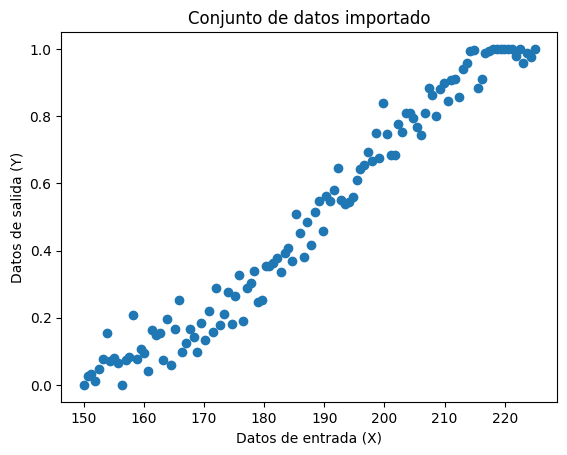

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files

# Subir, leer y cargar dataframe
uploaded = files.upload()
filename = list(uploaded.keys())[0]
data = pd.read_csv(filename)

# Asumiendo que el CSV tiene dos columnas: 'X' y 'Y'
trX = data.iloc[:, 0].values  # Primera columna como X
trY = data.iloc[:, 1].values  # Segunda columna como Y

# Graficar los datos cargados
plt.scatter(trX, trY)
plt.title("Conjunto de datos importado")
plt.xlabel("Datos de entrada (X)")
plt.ylabel("Datos de salida (Y)")
plt.show()

Modelo polinómico de regresión

Ingrese el orden del polinomio: 3


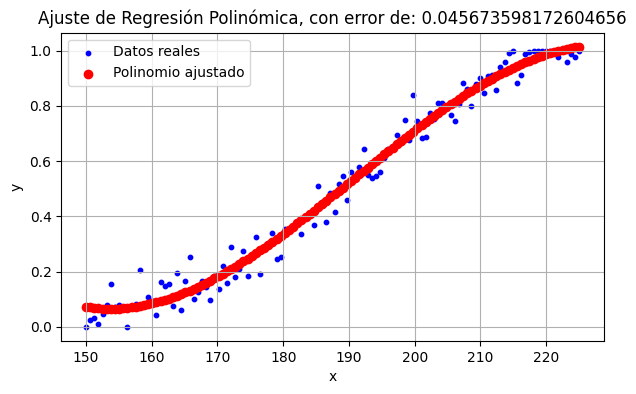

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Entrada = trX
Salida = trY
#Modelando
orden = int(input("Ingrese el orden del polinomio: "))
coef_ajustados = np.polyfit(Entrada, Salida, orden)
modelo2 = np.poly1d(coef_ajustados)

# Evaluando el modelo
Y_prediction = modelo2(Entrada)
mse = np.mean(np.square(Salida - Y_prediction))
rmse = np.sqrt(mse)

# Graficar los datos originales y los datos del polinomio ajustado
plt.figure(figsize=(7, 4))
plt.scatter(Entrada, Salida, label='Datos reales', color='blue', s=10)
plt.scatter(Entrada, Y_prediction, label='Polinomio ajustado', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste de Regresión Polinómica, con error de: '+str(rmse))
plt.legend()
plt.grid(True)
plt.show()

Implementando un perceptrón

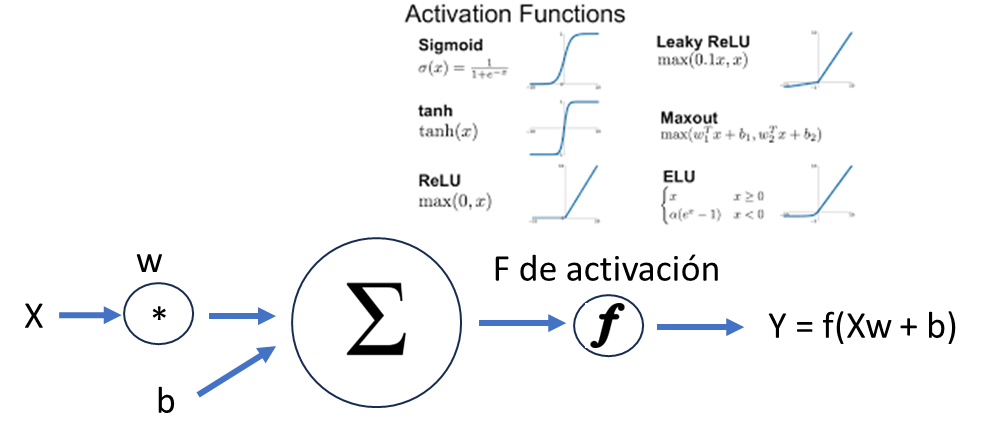

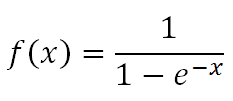

Los valores obtenidos son:  W1= 5.558242486324201 y b= -2.8269405779848684
Finalizado en  3999  iteraciones 


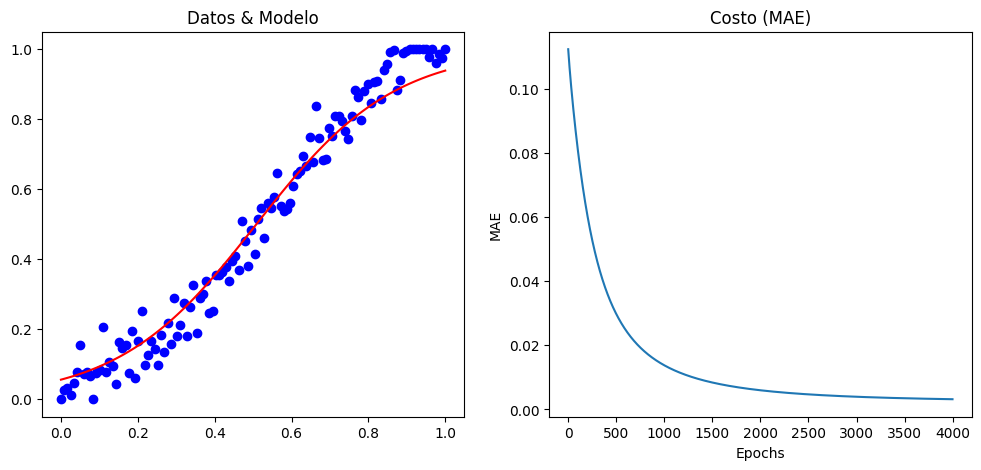

In [ ]:
from google.colab import output #Librería para limpiar la salida
import random

# Normalizando datos de entrada
trX = (Entrada - np.min(Entrada)) / (np.max(Entrada) - np.min(Entrada))
trY = (Salida - np.min(Salida)) / (np.max(Salida) - np.min(Salida))

# Como es un modelo lineal, la ecuación modelo es Y= 1/(1+e**-(W1X + b)), así:
#Valores iniciales
W1 = random.randrange(0,1)
b = random.randrange(0,1)

#trY=trY/max(trY) #Como la salida es normalizada, los datos de comparación deben ser normalizados

# Opciones adicionales
display_step = 100 #Es un comodín para decidir cada cuantas iteraciones deseamos ver los resultados
N = len(trX)
loss = []
Escala=max(trY)

# Proceso de optimización
epochs = 4000
learning_rate = 0.2
convergence_criteria = 1e-5
for step in range( epochs ):
    # Gradientes iniciales (Zero gradients)
    W1_gradient = 0
    b_gradient = 0
    error = 0
    Diferencia = 0

    # Calculamos el error y con ello, el gradiente
    for i in range(0, N):
      prY= (1/(1+np.exp(-(W1*trX[i] + b))))*Escala
      Diferencia = prY - trY[i]
      error += (Diferencia)**2
      # Calculamos el gradiente
      W1_gradient += (2/N)*(Diferencia)*prY*(1-prY)*trX[i]
      b_gradient += (2/N)*(Diferencia)*prY*(1-prY)

    MSE = error/N

    # Actualizamos los valores de acuerdo al gradiente
    W1 = W1 - ( W1_gradient * learning_rate )
    b = b - ( b_gradient * learning_rate )

    # Guardamos el objetivo por cada epoca
    loss.append( np.abs(MSE ))

    # Mostramos cada display_step epocas
    if step % display_step == 0:
        plt.scatter(trX, trY)
        pred_y = ((1/(1+np.exp(-(W1*trX + b))))*Escala)
        plt.title('Epoca: {0}'.format(step))
        plt.plot(trX, pred_y, "r")
        plt.show()
        plt.pause(1)
        output.clear()

    #Paramos el algoritmo cuando los hiperparámetros no estén cambiando lo suficiente
    if max(abs(learning_rate * m_gradient), abs(learning_rate * b_gradient)) < convergence_criteria:
        break


#=============Impresión de los resultados==========
print("Los valores obtenidos son: ", 'W1=',W1, 'y b=', b)
print("Finalizado en ", step, " iteraciones ")

_, axes = plt.subplots(1,2, figsize=(12,5))
axes[0].scatter(trX, trY, c="b"),axes[0].set_title("Datos & Modelo")
axes[0].plot(trX,(1/(1+np.exp(-(W1*trX + b)))*Escala), c="r")
axes[1].plot( loss ), axes[1].set_title("Costo (MAE)")
axes[1].set_xlabel("Epochs"), axes[1].set_ylabel("MAE")
plt.show()

Realizando predicciones

In [ ]:
# Ingresar un nuevo valor de temperatura manualmente
nuevo_x = float(input("Ingrese la temperatura en °C para predecir la eficiencia: "))
print(" ")


#Predición con regresiones polinómicas
nuevo_y1 = modelo2(nuevo_x)
print(f"\nPara una temperatura de {nuevo_x:.2f}°C, la eficiencia estimada con método 1 es {nuevo_y1:.4f}")

#Predicción con ANN
# Normalizar la entrada (usamos los mismos valores de normalización del entrenamiento)
nuevo_x_norm = (nuevo_x - np.min(Entrada)) / (np.max(Entrada) - np.min(Entrada))
nuevo_y_norm = (1/(1+np.exp(-(W1*nuevo_x_norm + b))))*Escala
nuevo_y = np.min(Salida) + nuevo_y_norm*(np.max(Salida) - np.min(Salida))
print(f"\nPara una temperatura de {nuevo_x:.2f}°C, la eficiencia estimada con ANN es {nuevo_y:.4f}")

Ingrese la temperatura en °C para predecir la eficiencia: 200
 

Para una temperatura de 200.00°C, la eficiencia estimada con método 1 es 0.7105

Para una temperatura de 200.00°C, la eficiencia estimada con ANN es 0.7065


#3. Modelo de perceptrón Multicapa

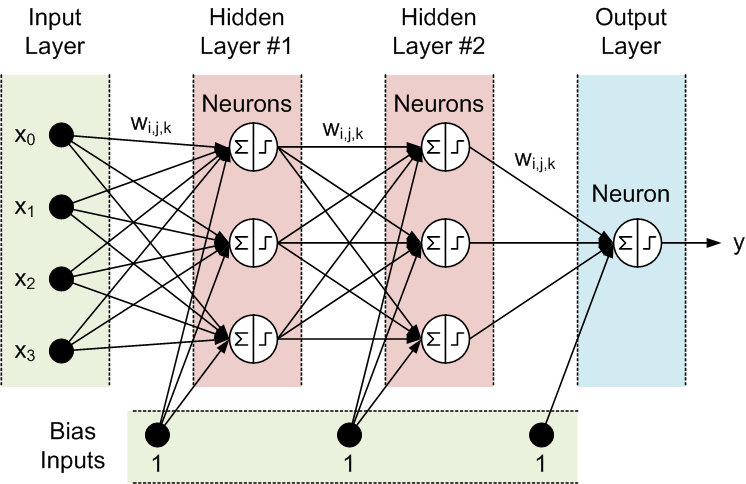

Cargando datos

Saving datos_extrusion.csv to datos_extrusion (2).csv


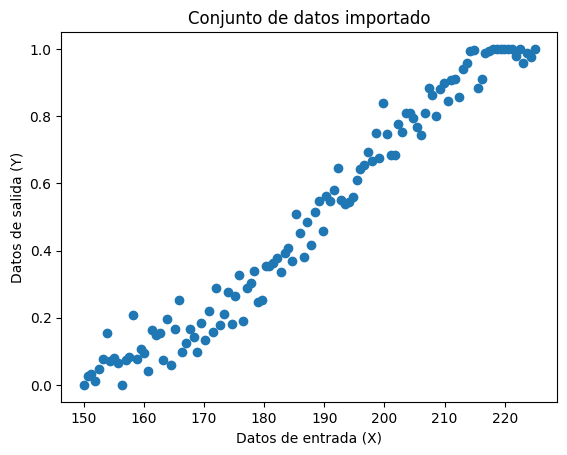

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files

# Subir, leer y cargar dataframe
uploaded = files.upload()
filename = list(uploaded.keys())[0]
data = pd.read_csv(filename)

# Asumiendo que el CSV tiene dos columnas: 'X' y 'Y'
Entrada = data.iloc[:, 0].values  # Primera columna como X
Salida = data.iloc[:, 1].values  # Segunda columna como Y

# Graficar los datos cargados
plt.scatter(Entrada, Salida)
plt.title("Conjunto de datos importado")
plt.xlabel("Datos de entrada (X)")
plt.ylabel("Datos de salida (Y)")
plt.show()

Ingrese el número de capas ocultas: 2
Ingrese el número de neuronas para la capa 1: 3
Ingrese el número de neuronas para la capa 2: 2
Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1390 - mae: 0.2886  
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1058 - mae: 0.2479  
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0872 - mae: 0.2278 
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0779 - mae: 0.2239
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0693 - mae: 0.2166 
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0611 - mae: 0.2062 
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0563 - mae: 0.2007 
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0540 - mae: 0.2007 
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0482 - mae: 0.1917 
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0534 - mae: 0.2077 
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0495 - mae: 

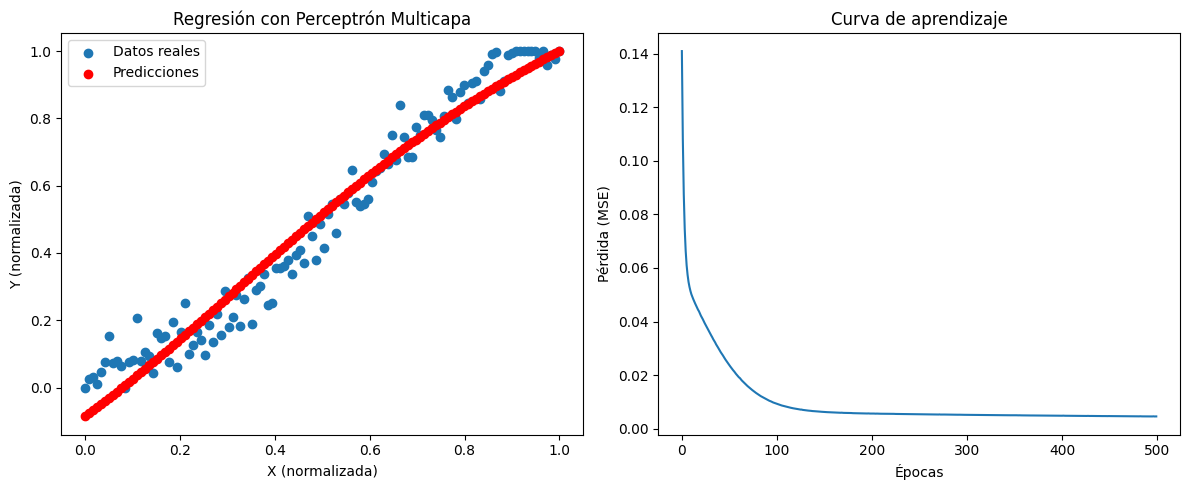

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Normalización min-max
trX = (Entrada - np.min(Entrada)) / (np.max(Entrada) - np.min(Entrada))
trY = (Salida  - np.min(Salida))  / (np.max(Salida)  - np.min(Salida))

# Definir la cantidad de capas y neuronas por capa
num_layers = int(input("Ingrese el número de capas ocultas: "))
neuronas_por_capa = [int(input(f"Ingrese el número de neuronas para la capa {i+1}: "))
                     for i in range(num_layers)]

# Construcción del modelo MLP
model = keras.Sequential()
model.add(layers.Dense(neuronas_por_capa[0], activation='tanh', input_shape=(1,)))
for n in neuronas_por_capa[1:]:
    model.add(layers.Dense(n, activation='tanh'))
model.add(layers.Dense(1))  # Capa de salida (regresión)

# Compilación del modelo
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

# Entrenamiento del modelo
history = model.fit(trX, trY, epochs=500, verbose=1)

# Predicción
Y_pred = model.predict(trX)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# ====== Gráfico 1: Datos vs predicción ======
axs[0].scatter(trX, trY, label="Datos reales")
axs[0].scatter(trX, Y_pred, color='r', label="Predicciones")
axs[0].set_xlabel("X (normalizada)")
axs[0].set_ylabel("Y (normalizada)")
axs[0].set_title("Regresión con Perceptrón Multicapa")
axs[0].legend()

# ====== Gráfico 2: Evolución del error ======
axs[1].plot(history.history['loss'])
axs[1].set_xlabel("Épocas")
axs[1].set_ylabel("Pérdida (MSE)")
axs[1].set_title("Curva de aprendizaje")

plt.tight_layout()
plt.show()


Realizando predicciones

In [ ]:
# Solicitar entrada del usuario
nuevo_x=np.array([float(input("Ingrese un valor de X para predecir Y: "))], dtype=np.float32)
nuevo_x_norm = (nuevo_x - np.min(Entrada)) / (np.max(Entrada) - np.min(Entrada))

# Realizar la predicción con el modelo
nuevo_y_norm = model.predict(nuevo_x_norm)

# Desnormalizar la salida (usamos los mismos valores de normalización del entrenamiento)
nuevo_y = np.min(Salida) + nuevo_y_norm*(np.max(Salida) - np.min(Salida))
print("Para una temperatura de: ",nuevo_x[0], "°C, la eficiencia estimada con ANN es de: ", nuevo_y[0,0])

Ingrese un valor de X para predecir Y: 200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Para una temperatura de:  200.0 °C, la eficiencia estimada con ANN es de:  0.704792857170105


#4. ANN en problemas de clasificación

Cargando datos

Saving Datos_clasificacion.csv to Datos_clasificacion.csv


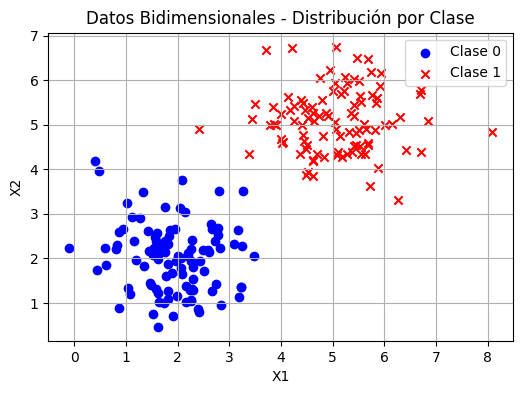

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from google.colab import files

uploaded = files.upload()  # Solicita al usuario cargar un archivo CSV
filename = list(uploaded.keys())[0]  # Tomar el nombre del archivo subido
df = pd.read_csv(filename)  # Leer el archivo CSV en un DataFrame
Datos=np.array(df)
X1 = Datos[:,0]
X2 = Datos[:,1]
Y = Datos[:,2]

plt.figure(figsize=(6, 4))

plt.scatter(X1[Y == 0], X2[Y == 0], color='blue', marker='o', label="Clase 0")
plt.scatter(X1[Y == 1], X2[Y == 1], color='red', marker='x', label="Clase 1")

# Configuración del gráfico
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Datos Bidimensionales - Distribución por Clase")
plt.legend()
plt.grid(True)
plt.show()

Generando modelo

Modelo entrenado: W1 = 5.2033, W2 = 6.1881, b = -5.2480
Finalizado en 3999 iteraciones


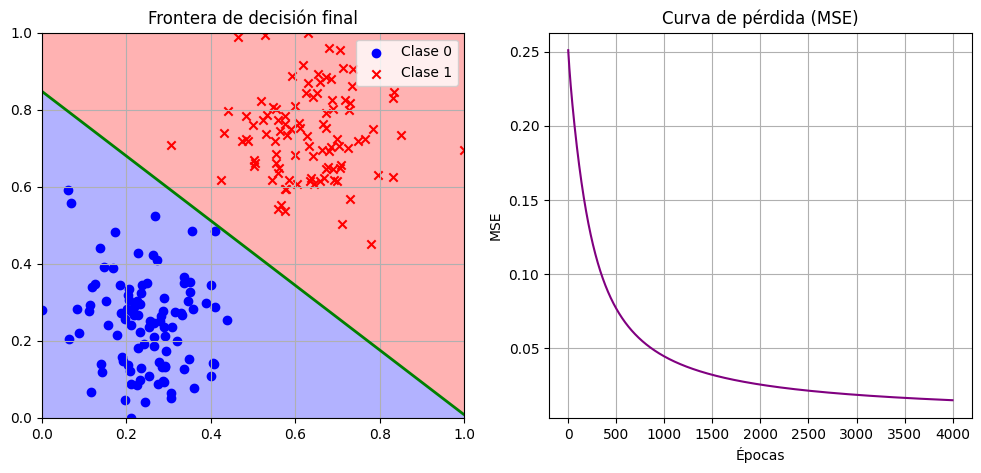

In [ ]:
from google.colab import output  # Librería para limpiar la salida
import numpy as np
import matplotlib.pyplot as plt
import random

# ================== Normalización ==================
X1_norm = (X1 - np.min(X1)) / (np.max(X1) - np.min(X1))
X2_norm = (X2 - np.min(X2)) / (np.max(X2) - np.min(X2))
Y_norm = Y  # 0 o 1 (binaria)

# ================== Inicialización ==================
W1 = random.uniform(0, 1)
W2 = random.uniform(0, 1)
b = random.uniform(0, 1)

epochs = 4000
learning_rate = 0.2
convergence_criteria = 1e-5
display_step = 100
loss = []

N = len(X1_norm)

# ================== Entrenamiento ==================
for step in range(epochs):
    W1_gradient, W2_gradient, b_gradient = 0, 0, 0
    error = 0

    for i in range(N):
        prY = 1 / (1 + np.exp(-(W1 * X1_norm[i] + W2 * X2_norm[i] + b)))
        Diferencia = prY - Y_norm[i]
        error += Diferencia**2
        W1_gradient += (2/N) * Diferencia * prY * (1 - prY) * X1_norm[i]
        W2_gradient += (2/N) * Diferencia * prY * (1 - prY) * X2_norm[i]
        b_gradient += (2/N) * Diferencia * prY * (1 - prY)

    MSE = error / N
    loss.append(MSE)

    # Actualización de parámetros
    W1 -= learning_rate * W1_gradient
    W2 -= learning_rate * W2_gradient
    b -= learning_rate * b_gradient

    # ===== Visualización cada display_step =====
    if step % display_step == 0:
        plt.figure(figsize=(6,5))

        # Datos reales
        plt.scatter(X1_norm[Y == 0], X2_norm[Y == 0], c="blue", marker="o", label="Clase 0")
        plt.scatter(X1_norm[Y == 1], X2_norm[Y == 1], c="red", marker="x", label="Clase 1")

        # Malla de puntos para visualizar frontera
        xx, yy = np.meshgrid(np.linspace(0, 1, 200), np.linspace(0, 1, 200))
        Z = 1 / (1 + np.exp(-(W1 * xx + W2 * yy + b)))

        # Colorear zonas
        plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.3, colors=["blue", "red"])
        # Frontera
        plt.contour(xx, yy, Z, levels=[0.5], colors="green", linewidths=2)

        plt.title(f"Época {step} - Frontera de decisión")
        plt.xlabel("X1 normalizado")
        plt.ylabel("X2 normalizado")
        plt.legend()
        plt.grid()
        plt.show()
        plt.pause(0.5)
        output.clear()  # Limpia la salida en Colab

    # Criterio de parada por convergencia
    if max(abs(learning_rate * W1_gradient), abs(learning_rate * W2_gradient), abs(learning_rate * b_gradient)) < convergence_criteria:
        break

# ================== Resultados finales ==================
print(f"Modelo entrenado: W1 = {W1:.4f}, W2 = {W2:.4f}, b = {b:.4f}")
print(f"Finalizado en {step} iteraciones")

# Gráficos finales
_, axes = plt.subplots(1, 2, figsize=(12,5))

# Frontera de decisión final
axes[0].scatter(X1_norm[Y == 0], X2_norm[Y == 0], c="blue", marker="o", label="Clase 0")
axes[0].scatter(X1_norm[Y == 1], X2_norm[Y == 1], c="red", marker="x", label="Clase 1")
xx, yy = np.meshgrid(np.linspace(0, 1, 200), np.linspace(0, 1, 200))
Z = 1 / (1 + np.exp(-(W1 * xx + W2 * yy + b)))
axes[0].contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.3, colors=["blue", "red"])
axes[0].contour(xx, yy, Z, levels=[0.5], colors="green", linewidths=2)
axes[0].set_title("Frontera de decisión final")
axes[0].legend()
axes[0].grid()

# Curva de pérdida
axes[1].plot(loss, color="purple")
axes[1].set_title("Curva de pérdida (MSE)")
axes[1].set_xlabel("Épocas")
axes[1].set_ylabel("MSE")
axes[1].grid()

plt.show()


In [ ]:
# ====== Predicción con el modelo entrenado ======
nuevo_x1 = float(input("Ingrese un valor para X1: "))
nuevo_x2 = float(input("Ingrese un valor para X2: "))

# Normalizar usando los mismos rangos del entrenamiento
nuevo_x1_norm = (nuevo_x1 - np.min(X1)) / (np.max(X1) - np.min(X1))
nuevo_x2_norm = (nuevo_x2 - np.min(X2)) / (np.max(X2) - np.min(X2))

# Calcular probabilidad usando la sigmoide
prob = 1 / (1 + np.exp(-(W1 * nuevo_x1_norm + W2 * nuevo_x2_norm + b)))

# Determinar clase (umbral 0.5)
clase_predicha = 1 if prob >= 0.5 else 0

print(f"\n Para la entrada (X1={nuevo_x1:.2f}, X2={nuevo_x2:.2f}):")
print(f"   - Probabilidad estimada de clase 1 = {prob:.4f}")
print(f"   - Clase predicha = {clase_predicha}")


Ingrese un valor para X1: 5
Ingrese un valor para X2: 2

 Para la entrada (X1=5.00, X2=2.00):
   - Probabilidad estimada de clase 1 = 0.3787
   - Clase predicha = 0


#5. Ahora un problema mas complejo

Modelo inicial

Saving Datos_clasificación_2.csv to Datos_clasificación_2.csv


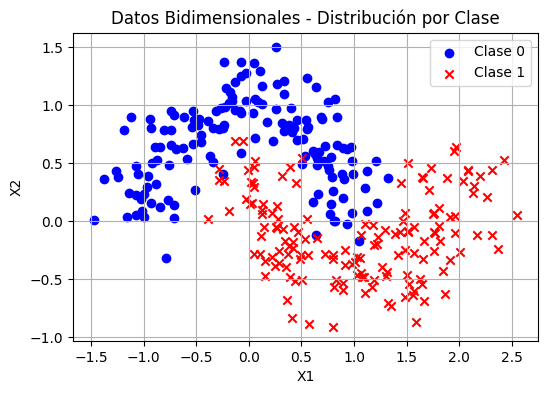

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from google.colab import files

uploaded = files.upload()  # Solicita al usuario cargar un archivo CSV
filename = list(uploaded.keys())[0]  # Tomar el nombre del archivo subido
df = pd.read_csv(filename)  # Leer el archivo CSV en un DataFrame
Datos=np.array(df)
X1 = Datos[:,0]
X2 = Datos[:,1]
Y = Datos[:,2]

plt.figure(figsize=(6, 4))

plt.scatter(X1[Y == 0], X2[Y == 0], color='blue', marker='o', label="Clase 0")
plt.scatter(X1[Y == 1], X2[Y == 1], color='red', marker='x', label="Clase 1")

# Configuración del gráfico
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Datos Bidimensionales - Distribución por Clase")
plt.legend()
plt.grid(True)
plt.show()

Modelo entrenado: W1 = 4.0594, W2 = -6.4737, b = 1.1312
Finalizado en 3999 iteraciones


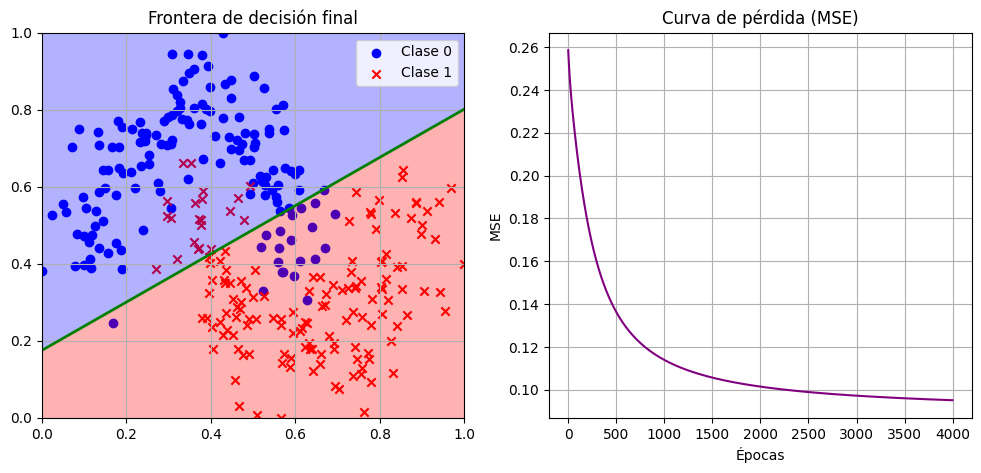

In [ ]:
from google.colab import output  # Librería para limpiar la salida
import numpy as np
import matplotlib.pyplot as plt
import random

# ================== Normalización ==================
X1_norm = (X1 - np.min(X1)) / (np.max(X1) - np.min(X1))
X2_norm = (X2 - np.min(X2)) / (np.max(X2) - np.min(X2))
Y_norm = Y  # 0 o 1 (binaria)

# ================== Inicialización ==================
W1 = random.uniform(0, 1)
W2 = random.uniform(0, 1)
b = random.uniform(0, 1)

epochs = 4000
learning_rate = 0.2
convergence_criteria = 1e-5
display_step = 100
loss = []

N = len(X1_norm)

# ================== Entrenamiento ==================
for step in range(epochs):
    W1_gradient, W2_gradient, b_gradient = 0, 0, 0
    error = 0

    for i in range(N):
        prY = 1 / (1 + np.exp(-(W1 * X1_norm[i] + W2 * X2_norm[i] + b)))
        Diferencia = prY - Y_norm[i]
        error += Diferencia**2
        W1_gradient += (2/N) * Diferencia * prY * (1 - prY) * X1_norm[i]
        W2_gradient += (2/N) * Diferencia * prY * (1 - prY) * X2_norm[i]
        b_gradient += (2/N) * Diferencia * prY * (1 - prY)

    MSE = error / N
    loss.append(MSE)

    # Actualización de parámetros
    W1 -= learning_rate * W1_gradient
    W2 -= learning_rate * W2_gradient
    b -= learning_rate * b_gradient

    # ===== Visualización cada display_step =====
    if step % display_step == 0:
        plt.figure(figsize=(6,5))

        # Datos reales
        plt.scatter(X1_norm[Y == 0], X2_norm[Y == 0], c="blue", marker="o", label="Clase 0")
        plt.scatter(X1_norm[Y == 1], X2_norm[Y == 1], c="red", marker="x", label="Clase 1")

        # Malla de puntos para visualizar frontera
        xx, yy = np.meshgrid(np.linspace(0, 1, 200), np.linspace(0, 1, 200))
        Z = 1 / (1 + np.exp(-(W1 * xx + W2 * yy + b)))

        # Colorear zonas
        plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.3, colors=["blue", "red"])
        # Frontera
        plt.contour(xx, yy, Z, levels=[0.5], colors="green", linewidths=2)

        plt.title(f"Época {step} - Frontera de decisión")
        plt.xlabel("X1 normalizado")
        plt.ylabel("X2 normalizado")
        plt.legend()
        plt.grid()
        plt.show()
        plt.pause(0.5)
        output.clear()  # Limpia la salida en Colab

    # Criterio de parada por convergencia
    if max(abs(learning_rate * W1_gradient), abs(learning_rate * W2_gradient), abs(learning_rate * b_gradient)) < convergence_criteria:
        break

# ================== Resultados finales ==================
print(f"Modelo entrenado: W1 = {W1:.4f}, W2 = {W2:.4f}, b = {b:.4f}")
print(f"Finalizado en {step} iteraciones")

# Gráficos finales
_, axes = plt.subplots(1, 2, figsize=(12,5))

# Frontera de decisión final
axes[0].scatter(X1_norm[Y == 0], X2_norm[Y == 0], c="blue", marker="o", label="Clase 0")
axes[0].scatter(X1_norm[Y == 1], X2_norm[Y == 1], c="red", marker="x", label="Clase 1")
xx, yy = np.meshgrid(np.linspace(0, 1, 200), np.linspace(0, 1, 200))
Z = 1 / (1 + np.exp(-(W1 * xx + W2 * yy + b)))
axes[0].contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.3, colors=["blue", "red"])
axes[0].contour(xx, yy, Z, levels=[0.5], colors="green", linewidths=2)
axes[0].set_title("Frontera de decisión final")
axes[0].legend()
axes[0].grid()

# Curva de pérdida
axes[1].plot(loss, color="purple")
axes[1].set_title("Curva de pérdida (MSE)")
axes[1].set_xlabel("Épocas")
axes[1].set_ylabel("MSE")
axes[1].grid()

plt.show()

Red de neuronas

Ingrese el número de capas ocultas: 10
Ingrese el número de neuronas para la capa 1: 10
Ingrese el número de neuronas para la capa 2: 10
Ingrese el número de neuronas para la capa 3: 8
Ingrese el número de neuronas para la capa 4: 8
Ingrese el número de neuronas para la capa 5: 6
Ingrese el número de neuronas para la capa 6: 6
Ingrese el número de neuronas para la capa 7: 4
Ingrese el número de neuronas para la capa 8: 4
Ingrese el número de neuronas para la capa 9: 3
Ingrese el número de neuronas para la capa 10: 3
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


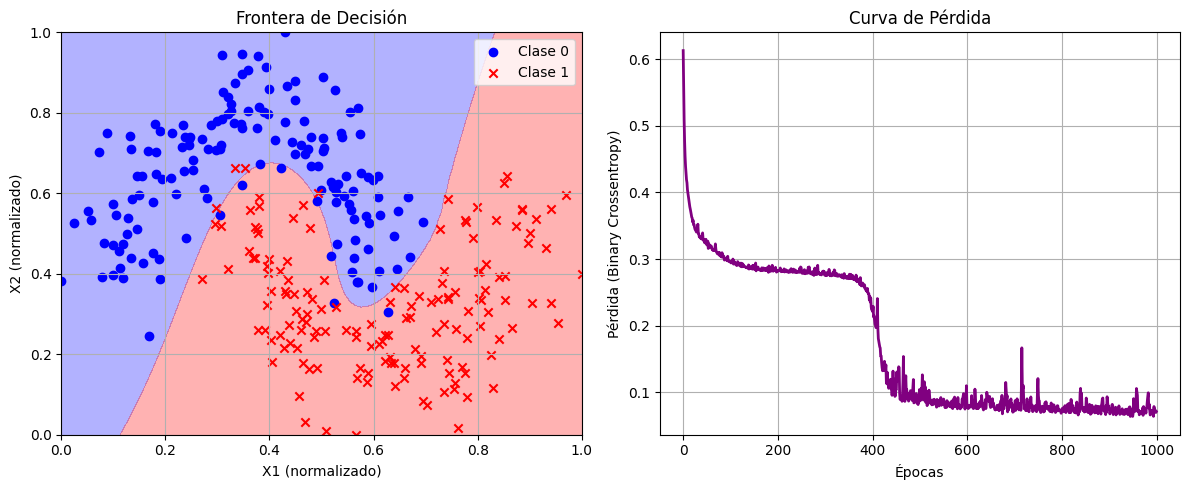

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings

warnings.filterwarnings("ignore")

X1_norm = (X1 - np.min(X1)) / (np.max(X1) - np.min(X1))
X2_norm = (X2 - np.min(X2)) / (np.max(X2) - np.min(X2))
Y_norm = Y  # No se normaliza porque es una variable categórica (0 o 1)

# Combinar las características en una matriz de entrada
trX = np.column_stack((X1_norm, X2_norm))
trY = Y_norm.reshape(-1, 1)  # Asegurar que Y tiene la forma correcta

# Definir la cantidad de capas y neuronas por capa
num_layers = int(input("Ingrese el número de capas ocultas: "))
neuronas_por_capa = [int(input(f"Ingrese el número de neuronas para la capa {i+1}: ")) for i in range(num_layers)]

# Construcción del modelo MLP
model = keras.Sequential()
model.add(layers.Dense(neuronas_por_capa[0], activation='tanh', input_shape=(2,)))  # Dos entradas (X1 y X2)
for n in neuronas_por_capa[1:]:
    model.add(layers.Dense(n, activation='tanh'))

model.add(layers.Dense(1, activation='sigmoid'))  # Salida binaria con sigmoide
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Entrenamiento del modelo
history = model.fit(trX, trY, epochs=1000, verbose=0)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Dos gráficos de igual tamaño
xx, yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(grid).reshape(xx.shape)  # Predecir en la malla
axes[0].contourf(xx, yy, Z, levels=[0, 0.5, 1], colors=['blue', 'red'], alpha=0.3)
axes[0].scatter(X1_norm[Y == 0], X2_norm[Y == 0], color='blue', marker='o', label="Clase 0")
axes[0].scatter(X1_norm[Y == 1], X2_norm[Y == 1], color='red', marker='x', label="Clase 1")
axes[0].set_xlabel("X1 (normalizado)")
axes[0].set_ylabel("X2 (normalizado)")
axes[0].set_title("Frontera de Decisión")
axes[0].legend()
axes[0].grid()

loss = history.history['loss']

axes[1].plot(loss, color='purple', linewidth=2)
axes[1].set_xlabel("Épocas")
axes[1].set_ylabel("Pérdida (Binary Crossentropy)")
axes[1].set_title("Curva de Pérdida")
axes[1].grid()

plt.tight_layout()
plt.show()

#6. Métricas de desempeño

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


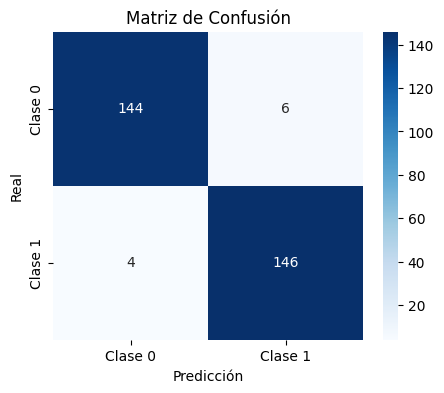

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97       150
         1.0       0.96      0.97      0.97       150

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



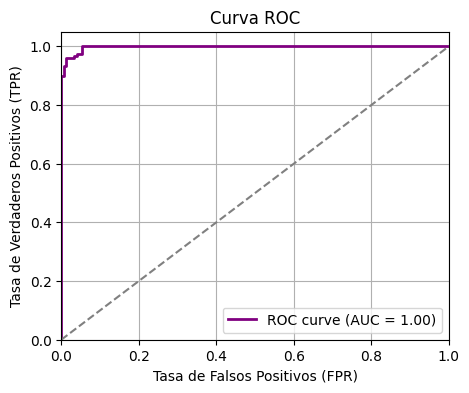

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns

Y_pred_prob = model.predict(trX)  # Probabilidades
Y_pred = (Y_pred_prob > 0.5).astype(int)  # Convertir a 0 o 1 según umbral 0.5

# Matriz de Confusión
cm = confusion_matrix(trY, Y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

# Reporte de Clasificación
print("Reporte de Clasificación:")
print(classification_report(trY, Y_pred))

# Curva ROC y AUC
fpr, tpr, _ = roc_curve(trY, Y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='purple', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid()
plt.show()

#7. Parcial 2

Punto 1: Estimación del Precio del Dólar - TRM (2 Puntos)
- Recolección de datos: Obtener datos históricos del TRM y organizarlos para que tenga 5 entradas (Equivalentes  al valor del dolar 5 días de seguido), y un valor de salida, equivalente all precio del dolar una semana después.
- Construcción del modelo: Usar una red neuronal multicapa para predecir el precio del dólar basado en datos históricos (Los datos procesados en el punto anterior).
- Implementación de interfaz: Desarrollar una interfaz para que el usuario pueda ingresar datos de 5 días del dolar y obtener predicciones lo que podría suceder una semana después.

Punto 2: Clasificación de Datos Suministrados en clase para el problema complejo(1 Punto)
- Optimización del modelo: Ajustar hiperparámetros y estructura de la red para lograr un desempeño superior al 97%.
- Evaluación: Validación con métricas como matriz de confusión, precisión y recall.

Punto 3: Clasificación con MNIST (2 Puntos)
- Carga y preprocesamiento del dataset MNIST.
- Diseño de una red neuronal MLP optimizada.
- Entrenamiento y evaluación del modelo.
- Implemente una estrategia para ponerlo a funcionar con imágenes reales de números hechos a mano.

Requisitos de entrega
- Material Utilizado: Datos, Modelos y código.
- Informe explicativo: Documentar los procesos, decisiones y resultados de cada punto.
- Video de presentación: Mostrar la implementación y análisis de los modelos.